In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns

path = "./datasets/_data.csv"
df = pd.read_csv(path)

In [ ]:
# 'Адрес' – analys
# Define 'City' column 
cities = df['Адрес'].apply(lambda x: x.split(',')[0])
cities.unique()

array(['Москва', 'Санкт-Петербург', 'Краснодарский край'], dtype=object)

In [ ]:
# 'Адрес' – remove rows with 'Москва', 'Санкт-Петербург'
df.drop(df[df['Адрес'].str.startswith('Санкт-Петербург')].index, inplace = True)
df.drop(df[df['Адрес'].str.startswith('Краснодарский край')].index, inplace = True)
cities = df['Адрес'].apply(lambda x: x.split(',')[0])
cities.unique()

array(['Москва'], dtype=object)

In [ ]:
df[['balcony', 'loggia']] = df.Балкон.str.split(",", expand = True)

cou = 0
for i in df['balcony']:
    new = str(i)
    cou = int(cou)
    if new[0] == 'Л':
        df.iloc[cou,26] = df.iloc[cou,25]
        df.iloc[cou,25] = ''
    cou = cou + 1
    
df = df.assign(balcony = lambda x: x['balcony'].str.extract('(\d+)'))
df = df.assign(loggia = lambda x: x['loggia'].str.extract('(\d+)'))
df['balcony'] = df['balcony'].fillna(0)
df['loggia'] = df['loggia'].fillna(0)

In [ ]:
### Сохранение только числовых значений в колонке 'Количество комнат' и поиск max

df = df.rename(columns={'Количество комнат': 'rooms'})
df = df.assign(rooms = lambda x: x['rooms'].str.extract('(\d+)'))

df['rooms'] = df['rooms'].fillna(0)
df = df.astype({'rooms':'int'})
df['rooms'].max()

6

In [ ]:
######### До этого значения все работает и готово

In [ ]:
df[['passenger_lift', 'service_lift']] = df.Лифт.str.split(",", expand = True)

cou = 0
for i in df['passenger_lift']:
    new = str(i)
    cou = int(cou)
    if new[0] == 'Г':
        df.iloc[cou,28] = df.iloc[cou,27]
        df.iloc[cou,28] = ''
    cou = cou + 1
    
df = df.assign(passenger_lift = lambda x: x['passenger_lift'].str.extract('(\d+)'))
df = df.assign(service_lift = lambda x: x['service_lift'].str.extract('(\d+)'))
df['passenger_lift'] = df['passenger_lift'].fillna(0)
df['service_lift'] = df['service_lift'].fillna(0)

In [ ]:
df[['sf1', 'sf2']] = df.Санузел.str.split(",", expand = True)

cou = 0
for i in df['sf1']:
    new = str(i)
    cou = int(cou)
    if new[0] == 'Р':
        df.iloc[cou,30] = df.iloc[cou,29]
        df.iloc[cou,29] = ''
    cou = cou + 1
    
df = df.assign(sf1 = lambda x: x['sf1'].str.extract('(\d+)'))
df = df.assign(sf2 = lambda x: x['sf2'].str.extract('(\d+)'))
df['sf1'] = df['sf1'].fillna(0)
df['sf2'] = df['sf2'].fillna(0)
df = df.astype({'sf1':'int'})
df = df.astype({'sf2':'int'})
df['bathroom'] = df['sf1'] + df['sf2'] 
df = df.astype({'bathroom':'int'})
df.drop(['sf1', 'sf2'], axis=1)

,Unnamed: 0,ID объявления,rooms,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,balcony,loggia,passenger_lift,service_lift,bathroom
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,0,0,4,1,0
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,0,0,1,1,3
2,2,271173086,4,Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,0,0,1,0,3
3,3,272197456,4,Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456,0,0,1,0,3
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,0,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",...,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511,1,0,1,1,1
23364,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",...,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844,0,1,1,1,1
23365,23365,268679909,2,Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909,1,0,0,0,1
23366,23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525,0,1,3,0,2


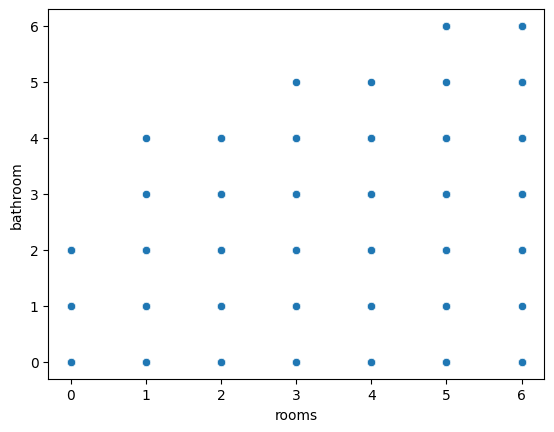

In [ ]:
sns.scatterplot(data=df, x="rooms", y="bathroom");